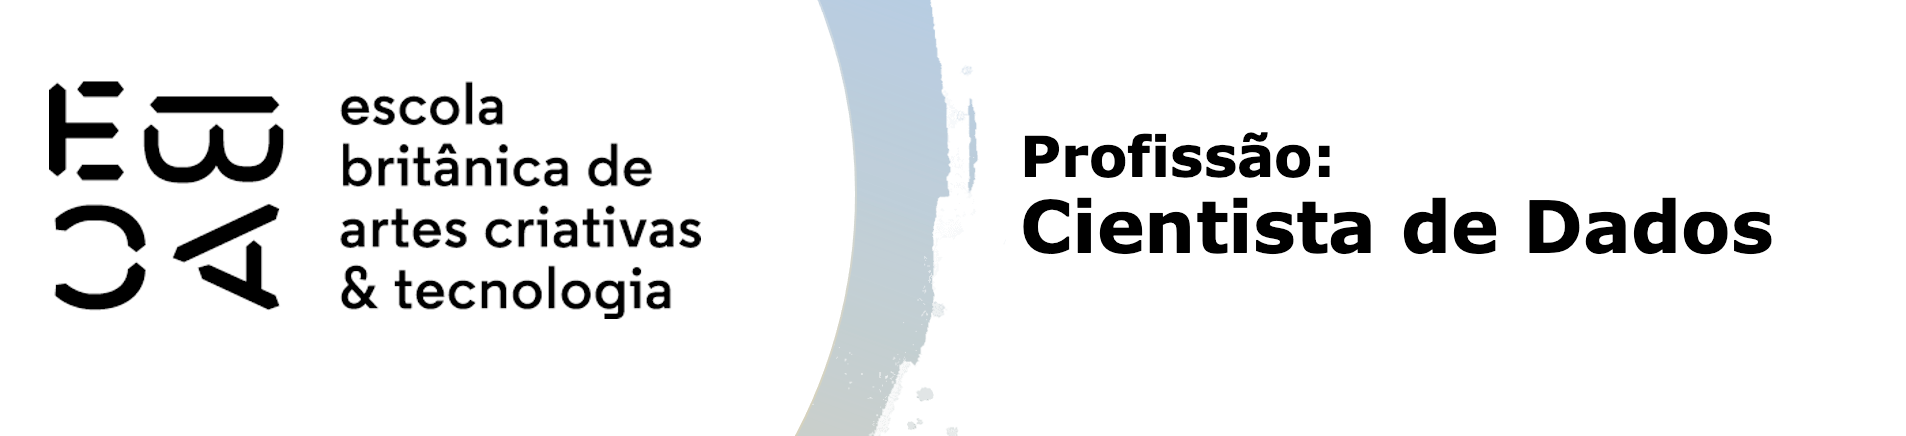

# Regressão III - Tarefa

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error, r2_score
from scipy.interpolate import interp1d

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
df = pd.read_csv('previsao_de_renda_II.csv', index_col=0)
df.head()

,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
data_ref,,,,,,,,,,,,,
2015-01-01,5762,M,S,N,0,Empresário,Superior completo,Casado,Casa,47,16.717808,2.0,11138.14
2015-01-01,1279,M,S,N,0,Assalariado,Superior incompleto,Casado,Casa,30,9.600000,2.0,2424.81
2015-01-01,14111,M,S,N,0,Assalariado,Superior completo,Casado,Casa,28,8.208219,2.0,13749.66
2015-01-01,8189,M,N,S,2,Assalariado,Médio,Casado,Casa,44,1.301370,4.0,2361.84
2015-01-01,1830,F,N,S,2,Assalariado,Superior completo,Casado,Casa,33,1.254795,4.0,790.78


In [3]:
print(df.shape)
df.info()

(750000, 13)
<class 'pandas.core.frame.DataFrame'>
Index: 750000 entries, 2015-01-01 to 2016-03-01
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   index                  750000 non-null  int64  
 1   sexo                   750000 non-null  object 
 2   posse_de_veiculo       750000 non-null  object 
 3   posse_de_imovel        750000 non-null  object 
 4   qtd_filhos             750000 non-null  int64  
 5   tipo_renda             750000 non-null  object 
 6   educacao               750000 non-null  object 
 7   estado_civil           750000 non-null  object 
 8   tipo_residencia        750000 non-null  object 
 9   idade                  750000 non-null  int64  
 10  tempo_emprego          624240 non-null  float64
 11  qt_pessoas_residencia  750000 non-null  float64
 12  renda                  750000 non-null  float64
dtypes: float64(3), int64(3), object(7)
memory usage: 80.1+ MB


## Avalie valores missing e substitua pela média

Neste exercício não vamos nos preocupar com valores *missing*. Substitua-os pela média.

In [4]:
df.isna().sum()

index                         0
sexo                          0
posse_de_veiculo              0
posse_de_imovel               0
qtd_filhos                    0
tipo_renda                    0
educacao                      0
estado_civil                  0
tipo_residencia               0
idade                         0
tempo_emprego            125760
qt_pessoas_residencia         0
renda                         0
dtype: int64

In [5]:
print(df['tempo_emprego'].mean())
df['tempo_emprego'].fillna(value=df['tempo_emprego'].mean(), inplace=True)
df.isna().sum()

7.746164800507006


index                    0
sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
qt_pessoas_residencia    0
renda                    0
dtype: int64

### Base de testes

Separe os três últimos meses como base *holdout* (base de teste).

In [6]:
df['data'] = df.index
print(f'Primeiro data registrada no df: {df["data"].min()}')
print(f'Última data registrada no df: {df["data"].max()}')

Primeiro data registrada no df: 2015-01-01
Última data registrada no df: 2016-03-01


In [7]:
df_train = df[:'2015-12-01']
df_test = df['2016-03-01':]
df_test.tail()

,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,data
data_ref,,,,,,,,,,,,,,
2016-03-01,11611,F,N,S,1,Assalariado,Superior completo,Casado,Casa,29,8.665753,3.0,2930.40,2016-03-01
2016-03-01,9144,F,N,S,0,Pensionista,Superior completo,Casado,Casa,65,7.746165,2.0,4084.37,2016-03-01
2016-03-01,16583,F,N,S,0,Assalariado,Superior completo,Casado,Casa,33,10.969863,2.0,4339.66,2016-03-01
2016-03-01,3024,F,S,S,1,Empresário,Superior completo,União,Casa,28,8.219178,3.0,9159.49,2016-03-01
2016-03-01,6074,F,N,S,0,Pensionista,Superior completo,Separado,Casa,62,7.746165,1.0,2243.21,2016-03-01


### Primeiro modelo
 Não use *index* e não use a data. Avalie o modelo com o $R^2-ajustado$

In [8]:
lista_de_colunas = list(df.columns)
lista_de_colunas = [col for col in df.columns if col not in ['renda', 'data', 'index']]
lista_de_colunas

['sexo',
 'posse_de_veiculo',
 'posse_de_imovel',
 'qtd_filhos',
 'tipo_renda',
 'educacao',
 'estado_civil',
 'tipo_residencia',
 'idade',
 'tempo_emprego',
 'qt_pessoas_residencia']

In [9]:
transformar = 'np.log(renda) ~ ' + ' + '.join(lista_de_colunas)
transformar

'np.log(renda) ~ sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + tipo_renda + educacao + estado_civil + tipo_residencia + idade + tempo_emprego + qt_pessoas_residencia'

In [29]:
res_linear = smf.ols('np.log(renda) ~ sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos '
              '+ tipo_renda + educacao + estado_civil + tipo_residencia + idade' 
              '+ tempo_emprego + qt_pessoas_residencia',data=df_train).fit()
res_linear.summary().tables[0]

Dep. Variable:,np.log(renda),R-squared:,0.438
Model:,OLS,Adj. R-squared:,0.438
Method:,Least Squares,F-statistic:,1.947e+04
Date:,"Tue, 27 Aug 2024",Prob (F-statistic):,0.00
Time:,20:39:07,Log-Likelihood:,-7.9748e+05
No. Observations:,600000,AIC:,1.595e+06
Df Residuals:,599975,BIC:,1.595e+06
Df Model:,24,,
Covariance Type:,nonrobust,,


In [11]:
tabela = pd.read_html(res_linear.summary().tables[1].as_html(), header=0, index_col=0)[0]
tabela.style.format(decimal=',', precision=4)\
    .highlight_between(
        left=.05
        , axis=1
        , props='color:red'
        , subset='P>|t|'
    ).set_properties(**{'background-color': '#ffffb3'}, subset=['[0.025', '0.975]'])

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,"7,4061","0,0460","159,3480","0,0000","7,3150","7,4970"
sexo[T.M],"0,1267","0,0030","46,4530","0,0000","0,1210","0,1320"
posse_de_veiculo[T.S],"0,0150","0,0030","5,7970","0,0000","0,0100","0,0200"
posse_de_imovel[T.S],"0,1874","0,0030","73,8370","0,0000","0,1820","0,1920"
tipo_renda[T.Bolsista],"-0,1577","0,0520","-3,0550","0,0020","-0,2590","-0,0570"
tipo_renda[T.Empresário],"0,1527","0,0030","52,1710","0,0000","0,1470","0,1580"
tipo_renda[T.Pensionista],"-0,2952","0,0040","-70,6760","0,0000","-0,3030","-0,2870"
tipo_renda[T.Servidor público],"0,1459","0,0040","33,8800","0,0000","0,1370","0,1540"
educacao[T.Médio],"0,0554","0,0110","5,0470","0,0000","0,0340","0,0770"
educacao[T.Pós graduação],"0,1196","0,0370","3,2300","0,0010","0,0470","0,1920"


In [12]:
print(f'R-quadrado: {res_linear.rsquared:.2%}')

R-quadrado: 39.33%


### Análise de perfil

Categorize a variável ```tempo_emprego``` em 20 quantis (cada categoria deve ter aproximadamente a mesma quantidade de observações) e faça uma tabela de perfil (armazene como dataframe) para esta categorização:

- Cada linha é uma categoria
- Uma coluna para a quantidade de observações de cada categoria
- Uma coluna para a média do log-renda para cada categoria
- Uma coluna para a média do tempo de emprego para cada categoria

Faça um gráfico da média do tempo de emprego pela média do log-renda. Insira uma célula de texto e comente se te parece que alguma das transformações vistas no módulo deve fornecer bons resultados.

In [13]:
df_train['tempo_emprego_cat'], quebras = pd.qcut(df_train['tempo_emprego'], 20, duplicates='drop', retbins=True)
df_train

C:\Users\mathe\AppData\Local\Temp\ipykernel_2472\3954661259.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['tempo_emprego_cat'], quebras = pd.qcut(df_train['tempo_emprego'], 20, duplicates='drop', retbins=True)


,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,data,tempo_emprego_cat
data_ref,,,,,,,,,,,,,,,
2015-01-01,5762,M,S,N,0,Empresário,Superior completo,Casado,Casa,47,16.717808,2.0,11138.14,2015-01-01,"(15.214, 20.216]"
2015-01-01,1279,M,S,N,0,Assalariado,Superior incompleto,Casado,Casa,30,9.600000,2.0,2424.81,2015-01-01,"(9.082, 10.436]"
2015-01-01,14111,M,S,N,0,Assalariado,Superior completo,Casado,Casa,28,8.208219,2.0,13749.66,2015-01-01,"(8.107, 9.082]"
2015-01-01,8189,M,N,S,2,Assalariado,Médio,Casado,Casa,44,1.301370,4.0,2361.84,2015-01-01,"(0.816, 1.458]"
2015-01-01,1830,F,N,S,2,Assalariado,Superior completo,Casado,Casa,33,1.254795,4.0,790.78,2015-01-01,"(0.816, 1.458]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-01,4650,F,N,S,1,Assalariado,Superior incompleto,Solteiro,Casa,37,4.441096,2.0,1893.35,2015-12-01,"(4.299, 4.934]"
2015-12-01,9717,M,S,S,0,Empresário,Médio,Casado,Estúdio,44,2.345205,2.0,3080.48,2015-12-01,"(2.096, 2.912]"
2015-12-01,7485,M,S,S,0,Assalariado,Médio,Casado,Casa,28,0.736986,2.0,5131.20,2015-12-01,"(0.11699999999999999, 0.816]"


In [14]:
quebras

array([ 0.11780822,  0.81643836,  1.45753425,  2.09589041,  2.91232877,
        3.63561644,  4.29863014,  4.93424658,  5.75890411,  6.62191781,
        7.47123288,  7.7461648 ,  8.10684932,  9.08219178, 10.43561644,
       12.46575342, 15.21369863, 20.21643836, 42.90684932])

In [15]:
tab = pd.DataFrame()
tab['qtd'] = df_train['tempo_emprego_cat'].value_counts()
df_train.loc[:, 'log_renda'] = np.log(df_train['renda'])
tab['log_renda_media'] = df_train.groupby('tempo_emprego_cat')['log_renda'].mean()
tab['tempo_emprego_media'] = df_train.groupby('tempo_emprego_cat')['tempo_emprego'].mean()
tab.sort_index(axis = 0, inplace = True)
print(tab.shape)
tab

(18, 3)


C:\Users\mathe\AppData\Local\Temp\ipykernel_2472\1405945856.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.loc[:, 'log_renda'] = np.log(df_train['renda'])


,qtd,log_renda_media,tempo_emprego_media
tempo_emprego_cat,,,
"(0.11699999999999999, 0.816]",30234,8.364965,0.515042
"(0.816, 1.458]",30031,8.454323,1.125014
"(1.458, 2.096]",29736,8.569544,1.781261
"(2.096, 2.912]",30013,8.624148,2.510920
"(2.912, 3.636]",30408,8.755365,3.301180
"(3.636, 4.299]",29625,8.855078,3.987156
"(4.299, 4.934]",30109,8.903273,4.610421
"(4.934, 5.759]",29991,9.049495,5.367829
"(5.759, 6.622]",30003,9.139216,6.205546


Text(0, 0.5, 'Média log renda')

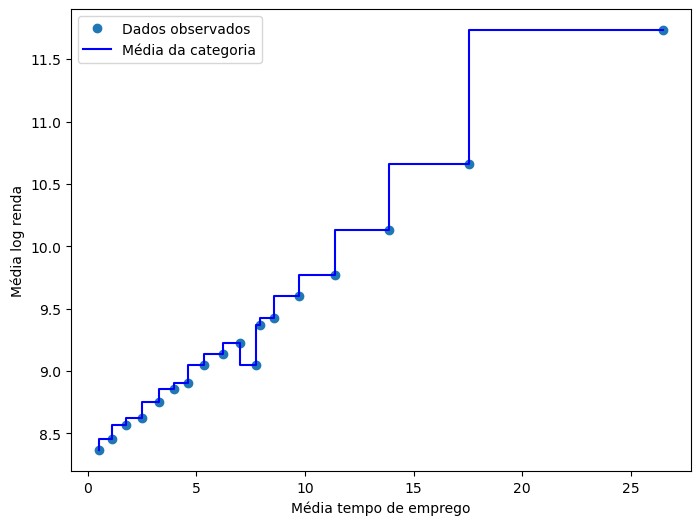

In [16]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(tab.tempo_emprego_media, tab.log_renda_media, "o", label="Dados observados", alpha=1)
ax.step(tab.tempo_emprego_media, tab.log_renda_media, "b-", label="Média da categoria", alpha=1)
ax.legend()
plt.xlabel('Média tempo de emprego')
plt.ylabel('Média log renda')

**R:** Podemos ver um claro movimento de crescimento da renda com o tempo de emprego, embora haja um ponto especifico que os dados caem, o que pode indicar um outlier. Acredito que os tipos de transformação regressão segmentada e lowess podem fornecer bons resultados.

### Linearização

Experimente pelo menos duas técnicas de linearização vistas ao longo do módulo para melhorar o ajuste da variável ```tempo_emprego```. Compare o $R^2-ajustado$ e avalie se alguma delas apresentou resultados relevantes com relação ao primeiro modelo.


**Regressão Segmentada**

In [17]:
C1 = 13

tab['X1_1'] = (tab.tempo_emprego_media<=C1)*tab.tempo_emprego_media + (tab.tempo_emprego_media>C1)*C1
tab['X1_2'] = (tab.tempo_emprego_media<=C1)*0 + (tab.tempo_emprego_media>C1)*(tab.tempo_emprego_media-C1)

res_segmentada = smf.ols('log_renda_media ~ X1_1', data=tab).fit()
print(f'R-quadrado: {res_segmentada.rsquared:.2%}')
res_segmentada.summary()

R-quadrado: 80.31%


C:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        log_renda_media   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     65.28
Date:                Tue, 27 Aug 2024   Prob (F-statistic):           4.88e-07
Time:                        19:59:42   Log-Likelihood:                -7.3848
No. Observations:                  18   AIC:                             18.77
Df Residuals:                      16   BIC:                             20.55
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.0899      0.177     45.712      0.000       7.715       8.465
X1_1           0.1826      0.023      8.080      0.000       0.135       0.231
==============================================================================
Omnibus:                       24.074   Durbin-Watson:                   0.690
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.040
Skew:                           2.093   Prob(JB):                     2.46e-08
Kurtosis:                       8.403   Cond. No.                         15.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Lowess**

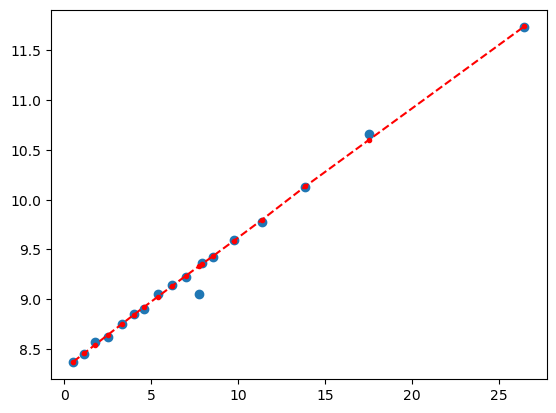

In [18]:
lowess = sm.nonparametric.lowess(tab.log_renda_media, tab.tempo_emprego_media, frac=2/3)
lowess_x = lowess[:, 0]
lowess_y = lowess[:, 1]
fig, ax = plt.subplots()

ax.plot(tab.tempo_emprego_media, tab.log_renda_media, "o", label="Dados observados", alpha=1)
ax.plot(tab.tempo_emprego_media, lowess_y, "r--.", label="Lowess")

In [19]:
f = interp1d(lowess_x, lowess_y, bounds_error=False)

tab['X1_lowess'] = f(tab.tempo_emprego_media)
tab.head()

,qtd,log_renda_media,tempo_emprego_media,X1_1,X1_2,X1_lowess
tempo_emprego_cat,,,,,,
"(0.11699999999999999, 0.816]",30234,8.364965,0.515042,0.515042,0.0,8.372511
"(0.816, 1.458]",30031,8.454323,1.125014,1.125014,0.0,8.455296
"(1.458, 2.096]",29736,8.569544,1.781261,1.781261,0.0,8.544318
"(2.096, 2.912]",30013,8.624148,2.510920,2.510920,0.0,8.643310
"(2.912, 3.636]",30408,8.755365,3.301180,3.301180,0.0,8.750386


In [20]:
res_lowess = smf.ols('log_renda_media ~ X1_lowess',data=tab).fit()
print(f'R-quadrado: {res_lowess.rsquared:.2%}')

res_lowess.summary()

R-quadrado: 99.33%


C:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        log_renda_media   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     2371.
Date:                Tue, 27 Aug 2024   Prob (F-statistic):           8.01e-19
Time:                        19:59:42   Log-Likelihood:                 23.036
No. Observations:                  18   AIC:                            -42.07
Df Residuals:                      16   BIC:                            -40.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0364      0.193     -0.189      0.853      -0.445       0.372
X1_lowess      1.0025      0.021     48.698      0.000       0.959       1.046
==============================================================================
Omnibus:                       41.009   Durbin-Watson:                   2.133
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              118.279
Skew:                          -3.346   Prob(JB):                     2.07e-26
Kurtosis:                      13.627   Cond. No.                         109.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Avaliando o modelo

Avalie os resultados dos modelos construidos na base de testes.

In [21]:
df_test.head(3)

,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,data
data_ref,,,,,,,,,,,,,,
2016-03-01,13799,F,S,N,0,Pensionista,Fundamental,Casado,Casa,64,7.746165,2.0,2345.74,2016-03-01
2016-03-01,694,F,N,S,0,Assalariado,Médio,União,Casa,32,13.865753,2.0,1562.99,2016-03-01
2016-03-01,13352,M,S,N,0,Empresário,Superior completo,Casado,Casa,53,6.602740,2.0,1016.51,2016-03-01


**Regressão linear**

In [22]:
formula = 'np.log(renda) ~ ' + ' + '.join(lista_de_colunas)
res_linear_test = smf.ols(formula, data=df_test).fit()

tabela = pd.read_html(res_linear_test.summary().tables[1].as_html(), header=0, index_col=0)[0]
tabela.style.format(decimal=',', precision=4)\
    .highlight_between(left=.05, axis=1, props='color:red', subset='P>|t|')\
    .set_properties(**{'background-color': '#ffffb3'}, subset=['[0.025', '0.975]'])
res_linear_test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     2657.
Date:                Tue, 27 Aug 2024   Prob (F-statistic):               0.00
Time:                        19:59:43   Log-Likelihood:                -53963.
No. Observations:               50000   AIC:                         1.080e+05
Df Residuals:                   49975   BIC:                         1.082e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            6.3115      0.138     45.691      0.000       6.041       6.582
sexo[T.M]                            0.1300      0.008     17.267      0.000       0.115       0.145
posse_de_veiculo[T.S]                0.0109      0.007      1.519      0.129      -0.003       0.025
posse_de_imovel[T.S]                 0.1860      0.007     26.518      0.000       0.172       0.200
tipo_renda[T.Bolsista]              -0.1010      0.126     -0.801      0.423      -0.348       0.146
tipo_renda[T.Empresário]             0.1550      0.008     19.201      0.000       0.139       0.171
tipo_renda[T.Pensionista]           -0.3082      0.012    -26.741      0.000      -0.331      -0.286
tipo_renda[T.Servidor público]       0.1277      0.012     10.893      0.000       0.105       0.151
educacao[T.Médio]                   -0.0009      0.031     -0.028      0.978      -0.061       0.059
educacao[T.Pós graduação]            0.3226      0.096      3.353      0.001       0.134       0.511
educacao[T.Superior completo]        0.1008      0.031      3.289      0.001       0.041       0.161
educacao[T.Superior incompleto]      0.0519      0.034      1.510      0.131      -0.015       0.119
estado_civil[T.Separado]             0.1626      0.067      2.422      0.015       0.031       0.294
estado_civil[T.Solteiro]             0.1248      0.066      1.892      0.059      -0.005       0.254
estado_civil[T.União]                0.0014      0.012      0.113      0.910      -0.022       0.025
estado_civil[T.Viúvo]                0.1141      0.068      1.684      0.092      -0.019       0.247
tipo_residencia[T.Casa]             -0.0734      0.027     -2.729      0.006      -0.126      -0.021
tipo_residencia[T.Com os pais]      -0.0396      0.030     -1.301      0.193      -0.099       0.020
tipo_residencia[T.Comunitário]      -0.0512      0.055     -0.927      0.354      -0.159       0.057
tipo_residencia[T.Estúdio]          -0.0911      0.046     -1.999      0.046      -0.180      -0.002
tipo_residencia[T.Governamental]    -0.0871      0.032     -2.688      0.007      -0.151      -0.024
qtd_filhos                          -0.1297      0.066     -1.972      0.049      -0.259      -0.001
idade                                0.0046      0.000     11.092      0.000       0.004       0.005
tempo_emprego                        0.1288      0.001    228.646      0.000       0.128       0.130
qt_pessoas_residencia                0.1290      0.066      1.964      0.050       0.000       0.258
==============================================================================
Omnibus:                        4.900   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.086   Jarque-Bera (JB):                5.014
Skew:             

**Regressão Segmentada**

In [23]:
df_test['tempo_emprego_cat'] = pd.cut(df_test['tempo_emprego'], bins=quebras, labels=False, include_lowest=True)
tab_test = pd.DataFrame()
tab_test['qtd'] = df_test['tempo_emprego_cat'].value_counts()
df_test.loc[:, 'log_renda'] = np.log(df_test['renda'])
tab_test['log_renda_media'] = df_test.groupby('tempo_emprego_cat')['log_renda'].mean()
tab_test['tempo_emprego_media'] = df_test.groupby('tempo_emprego_cat')['tempo_emprego'].mean()
tab_test.sort_index(axis=0, inplace=True)

C1 = 13

df_test['X1_1'] = (df_test.tempo_emprego<=C1)* df_test.tempo_emprego + (df_test.tempo_emprego>C1)*C1
df_test['X1_2'] = (df_test.tempo_emprego<=C1)*0 + (df_test.tempo_emprego>C1)*(df_test.tempo_emprego-C1)

res_segmentada_test = smf.ols('np.log(renda) ~ X1_1', data=df_test).fit()
res_segmentada_test.summary()

C:\Users\mathe\AppData\Local\Temp\ipykernel_2472\1833370339.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['tempo_emprego_cat'] = pd.cut(df_test['tempo_emprego'], bins=quebras, labels=False, include_lowest=True)
C:\Users\mathe\AppData\Local\Temp\ipykernel_2472\1833370339.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.loc[:, 'log_renda'] = np.log(df_test['renda'])
C:\Users\mathe\AppData\Local\Temp\ipykernel_2472\1833370339.py:11: SettingWithCopyWarning: 
A value is trying to be set 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.404
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                 3.390e+04
Date:                Tue, 27 Aug 2024   Prob (F-statistic):               0.00
Time:                        19:59:43   Log-Likelihood:                -61583.
No. Observations:               50000   AIC:                         1.232e+05
Df Residuals:                   49998   BIC:                         1.232e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7042      0.008    891.332      0.000       6.689       6.719
X1_1           0.1775      0.001    184.113      0.000       0.176       0.179
==============================================================================
Omnibus:                     1995.601   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2898.507
Skew:                           0.390   Prob(JB):                         0.00
Kurtosis:                       3.884   Cond. No.                         16.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Lowess**

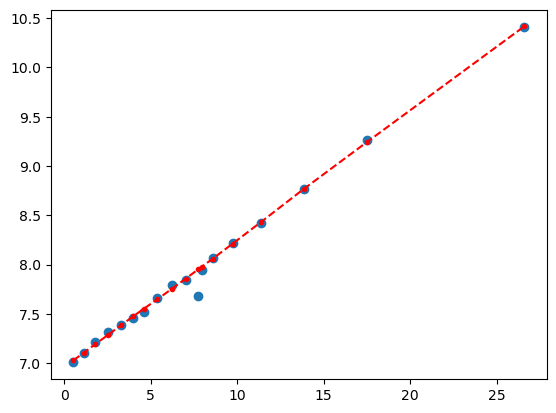

In [24]:
lowess = sm.nonparametric.lowess(tab_test.log_renda_media, tab_test.tempo_emprego_media, frac=2/3)
lowess_x = lowess[:, 0]
lowess_y = lowess[:, 1]
fig, ax = plt.subplots()

ax.plot(tab_test.tempo_emprego_media, tab_test.log_renda_media, "o", label="Dados observados", alpha=1)
ax.plot(tab_test.tempo_emprego_media, lowess_y, "r--.", label="Lowess")

In [25]:
f = interp1d(lowess_x, lowess_y, bounds_error=False)

tab_test['X1_lowess'] = f(tab_test.tempo_emprego_media)
tab_test.head()

,qtd,log_renda_media,tempo_emprego_media,X1_lowess
tempo_emprego_cat,,,,
0,2524,7.007151,0.514909,7.027703
1,2585,7.102517,1.123182,7.106219
2,2590,7.216011,1.784585,7.191433
3,2524,7.311311,2.514888,7.285687
4,2401,7.384263,3.296218,7.386934


In [26]:
res_lowess_test = smf.ols('log_renda_media ~ X1_lowess',data=tab_test).fit()
res_lowess_test.summary()

C:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        log_renda_media   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     2648.
Date:                Tue, 27 Aug 2024   Prob (F-statistic):           3.33e-19
Time:                        19:59:44   Log-Likelihood:                 23.980
No. Observations:                  18   AIC:                            -43.96
Df Residuals:                      16   BIC:                            -42.18
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0142      0.156     -0.091      0.928      -0.344       0.316
X1_lowess      0.9999      0.019     51.459      0.000       0.959       1.041
==============================================================================
Omnibus:                       40.715   Durbin-Watson:                   1.759
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              115.415
Skew:                          -3.329   Prob(JB):                     8.67e-26
Kurtosis:                      13.466   Cond. No.                         79.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
print('Resultados dos modelos construidos na base de testes')
print('Regressão linear')
print(f'R-quadrado: {res_linear_test.rsquared:.2f}')
print(f'R-quadrado Ajustado: {res_linear_test.rsquared_adj:.2f}\n')
print('Regressão Segmentada')
print(f'R-quadrado: {res_segmentada_test.rsquared:.2f}')
print(f'R-quadrado Ajustado: {res_segmentada_test.rsquared_adj:.2f}\n')
print('Lowess')
print(f'R-quadrado: {res_lowess_test.rsquared:.2f}')
print(f'R-quadrado Ajustado: {res_lowess_test.rsquared_adj:.2f}\n')

Resultados dos modelos construidos na base de testes
Regressão linear
R-quadrado: 0.56
R-quadrado Ajustado: 0.56

Regressão Segmentada
R-quadrado: 0.40
R-quadrado Ajustado: 0.40

Lowess
R-quadrado: 0.99
R-quadrado Ajustado: 0.99

